<a href="https://colab.research.google.com/github/kaybrian/Maternal-Health-Risk-Data-ML-model/blob/main/Maternal_Health_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the needed Modules for the project

import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline


2024-06-20 15:38:49.403916: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 15:38:49.509528: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 15:38:51.532826: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 15:38:53.383979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Import the data needed for the work
data = pd.read_csv('./data/Maternal Health Risk Data Set.csv')

# View the first few rows of the dataset
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
#  Check the summary statistics of the dataset
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### check for any missing data in the dataset


In [4]:
# Check for missing values in the dataset
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

### Check for the data types in the data 

In [5]:
# View the data types of each column
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

### look at the distribution of the Risk Level and also the count of it 

In [6]:
# look at teh Risk Level cases
data['RiskLevel'].value_counts()


RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

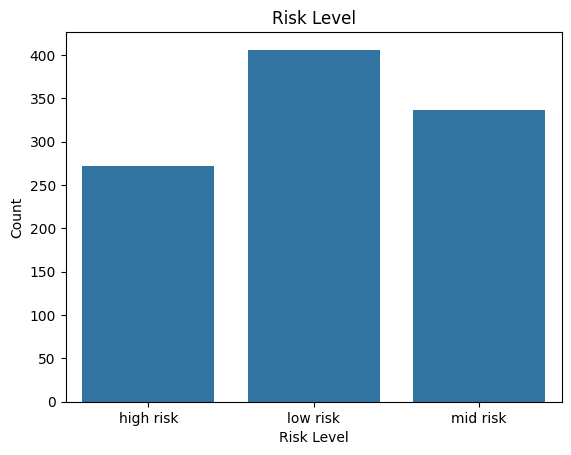

In [7]:
# Visualize the Risk Level cases
sns.countplot(x='RiskLevel', data=data)
plt.title('Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

In [8]:
# describe the data
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


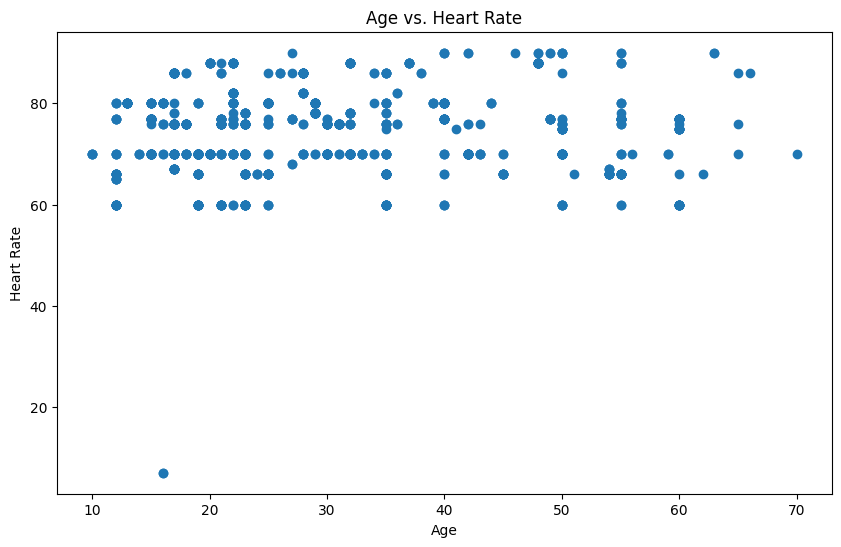

In [9]:
# take a close look at the age and heartbeat to see if there any out layers
# plot the age and heartbeat distribution
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['HeartRate'])
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Age vs. Heart Rate')
plt.show()

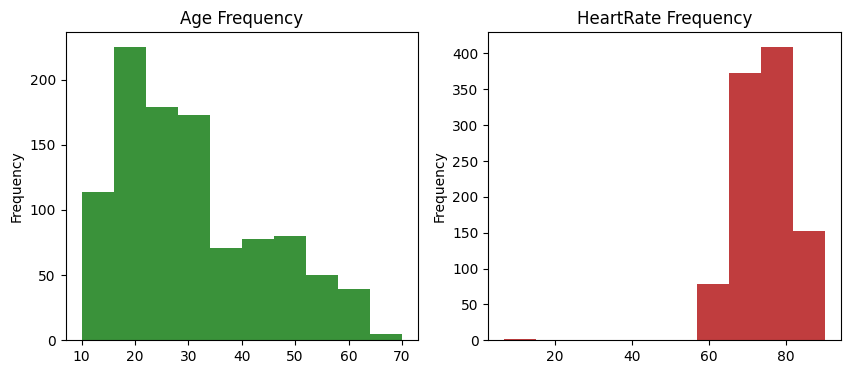

In [10]:
plt.subplots(1, 2, figsize = (10, 4))
plt.subplot(121)
data.Age.plot.hist(color = "#3a923a")
plt.title("Age Frequency");

plt.subplot(122)
data.HeartRate.plot.hist(color = "#c03d3e")
plt.title("HeartRate Frequency");
plt.show()

### Get a general overview of the data distruntion and outliers


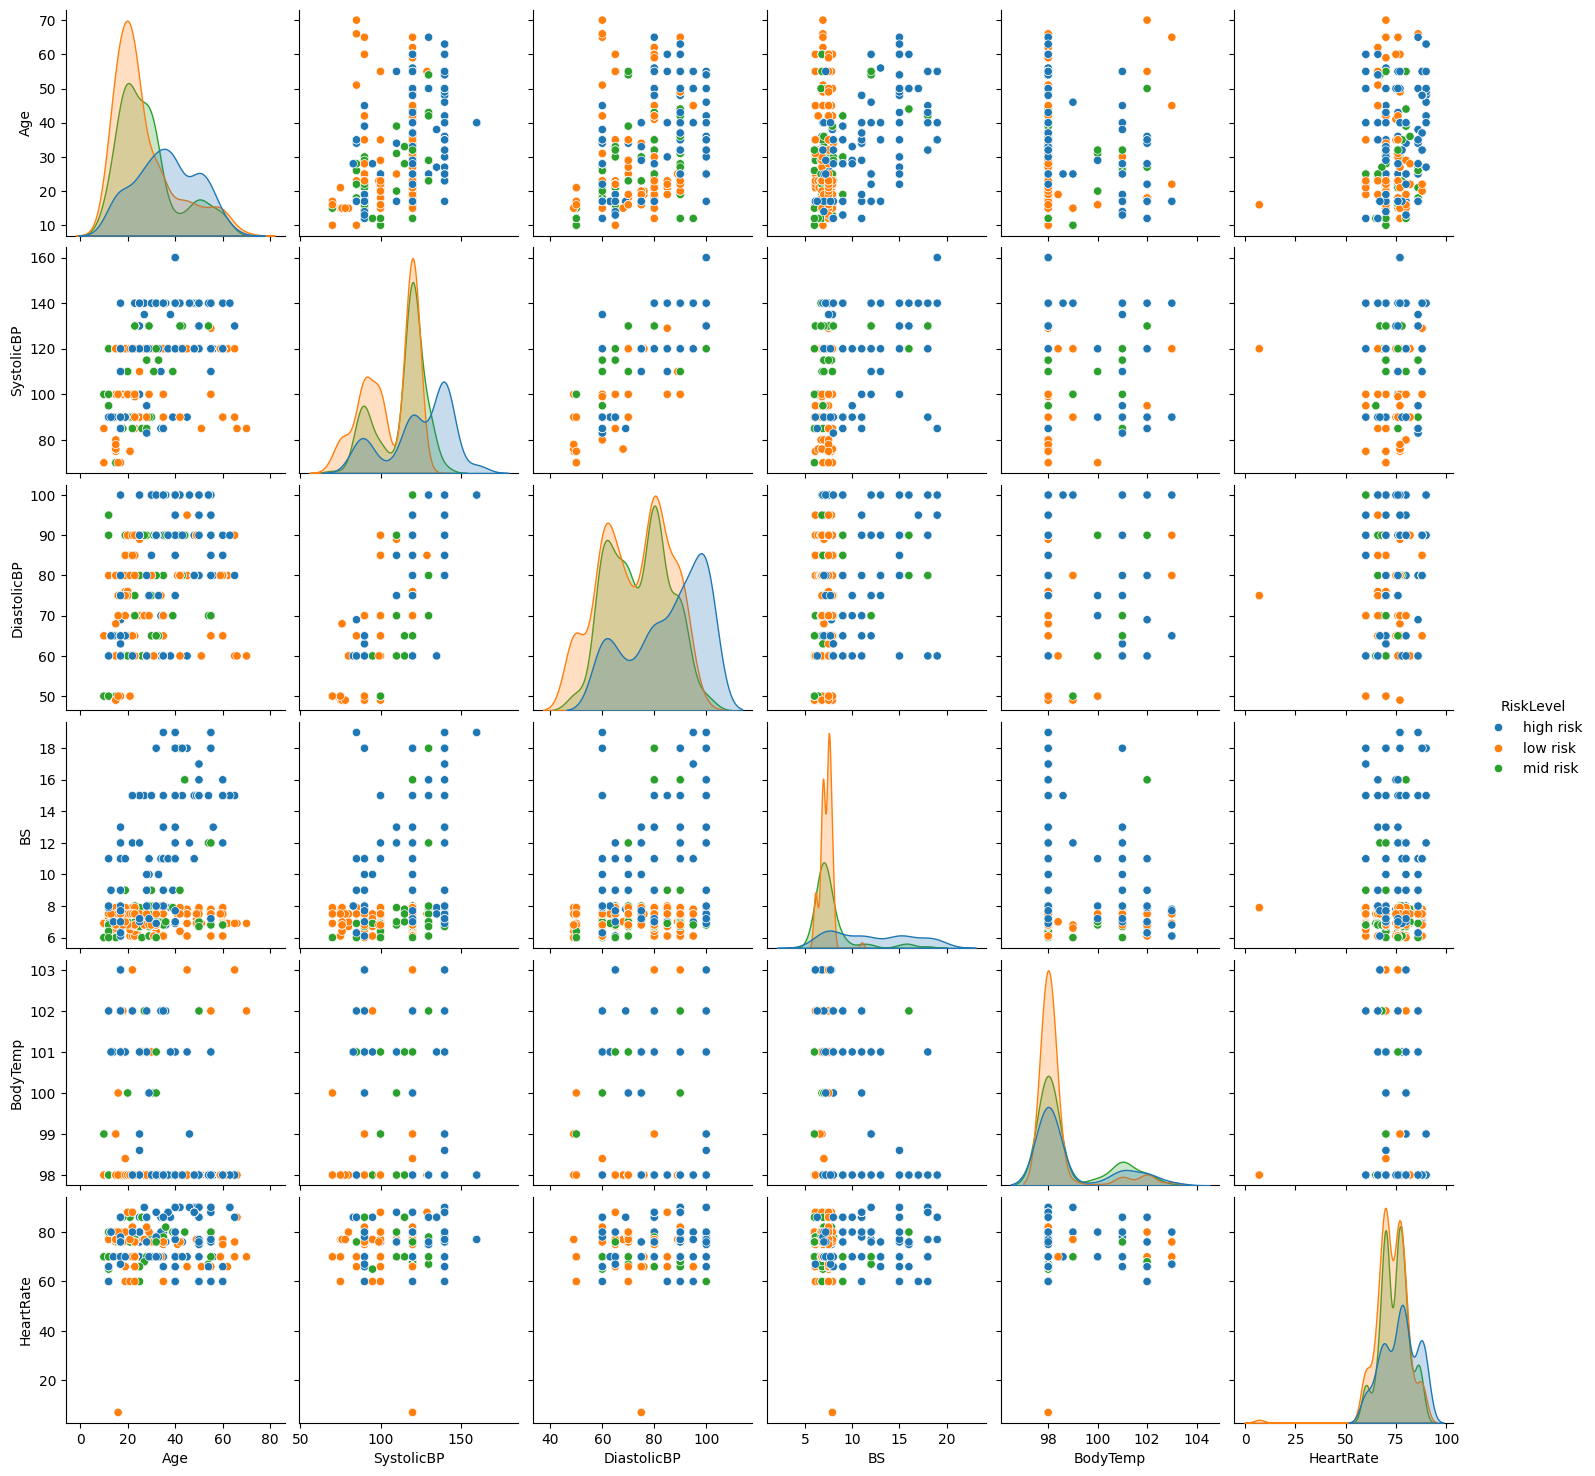

In [11]:
sns.pairplot(data.iloc[:,:], hue = "RiskLevel");
plt.show()

## Ecnode the Categories of the data. 



In [12]:
risk_map = {"low risk": 0, "mid risk": 1, "high risk": 2}

data['RiskLevel'] = data['RiskLevel'].map(risk_map)

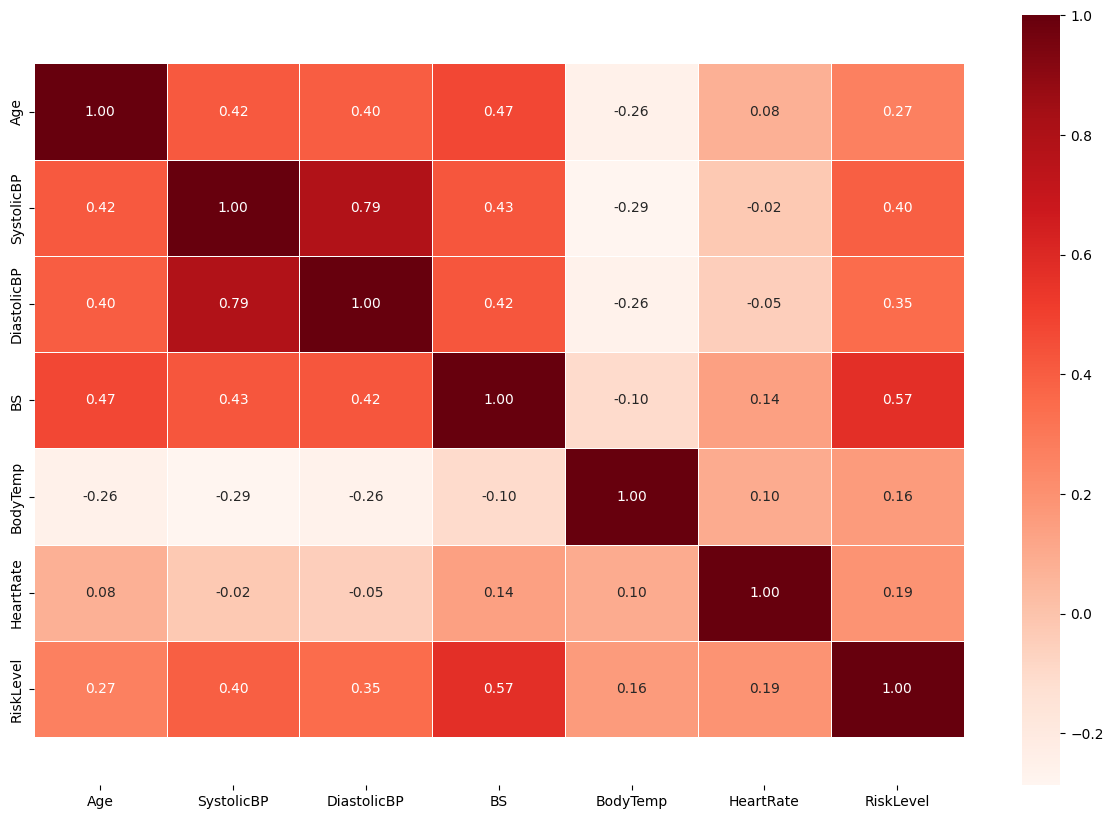

In [13]:
# plot a correlation heatmap
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "Reds");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

### Get the Features and Labels for the model


In [14]:
X = data.drop(['RiskLevel'], axis = 1)
y = data['RiskLevel']

In [15]:
y


0       2
1       2
2       2
3       2
4       0
       ..
1009    2
1010    2
1011    2
1012    2
1013    1
Name: RiskLevel, Length: 1014, dtype: int64

# split data into Training and Testing Sets 

In [16]:
#  split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
# standardize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
X_train

array([[0.73333333, 0.77777778, 1.        , 0.69230769, 0.        ,
        0.71084337],
       [0.66666667, 0.77777778, 0.80392157, 0.69230769, 0.        ,
        1.        ],
       [0.13333333, 0.55555556, 0.60784314, 0.14615385, 0.8       ,
        0.8313253 ],
       ...,
       [0.11666667, 0.22222222, 0.2745098 , 0.06923077, 0.6       ,
        0.75903614],
       [0.91666667, 0.66666667, 0.60784314, 0.69230769, 0.        ,
        0.95180723],
       [0.63333333, 0.77777778, 0.80392157, 0.69230769, 0.        ,
        1.        ]])

In [19]:
X_test.shape

(305, 6)

## Modeling 

### Build the model

In [21]:
# build  the first model  model using tensorflow and Keras with any any optimization techniques
model = Sequential([
    Dense(32, activation = 'relu', input_shape = X_train.shape[1:]),
    Dense(16, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803 (3.14 KB)

 Trainable params: 803 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))
### Evaluate the model

model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2576 - loss: 1.1121 - val_accuracy: 0.4918 - val_loss: 1.0775
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5421 - loss: 1.0668 - val_accuracy: 0.5475 - val_loss: 1.0503
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5512 - loss: 1.0374 - val_accuracy: 0.5377 - val_loss: 1.0256
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5989 - loss: 1.0052 - val_accuracy: 0.5377 - val_loss: 0.9968
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5907 - loss: 0.9788 - val_accuracy: 0.5377 - val_loss: 0.9662
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5743 - loss: 0.9480 - val_accuracy: 0.5639 - val_loss: 0.9346
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5961 - loss: 0.9081 - val_accuracy: 0.5574 - val_loss: 0.9055
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5845 - loss: 0.8867 - val_accuracy: 0.5607 - 

In [23]:
# make predictions on the data to see

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
predictions

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([1, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1,
       0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       2, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2,

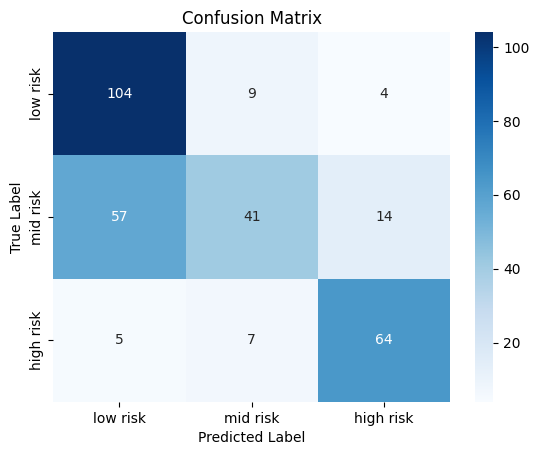

In [24]:
# create a confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index = ['low risk', 'mid risk', 'high risk'], columns = ['low risk', 'mid risk', 'high risk'])

sns.heatmap(cm_df, annot = True, cmap = 'Blues', fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


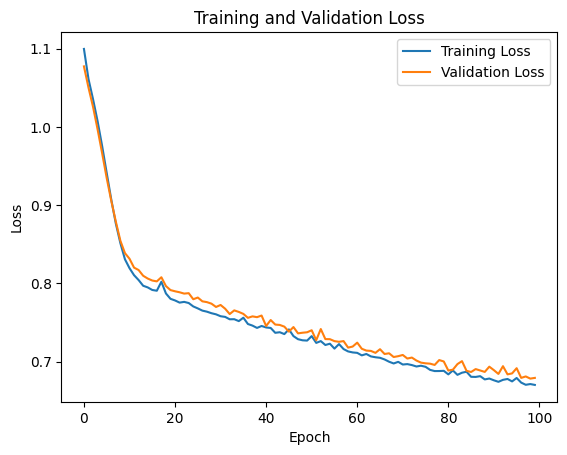

In [25]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

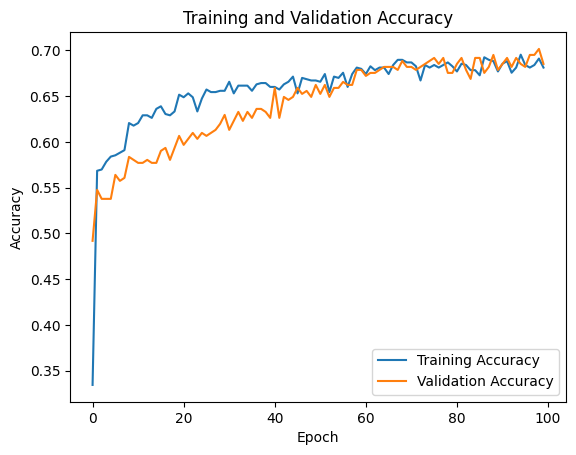

In [26]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
# Save the model in the pickle file in the Saved Models folder
import pickle
pickle.dump(model, open('./Saved Models/mother_health_model.pkl', 'wb'))

# Now We need to build a model with Some regularization 

For this model we will use L2 regularization and also add in a dropout layer. With  some early stopping in the data 


In [30]:
Model2 = Sequential([
    Dense(64, activation = 'relu', input_shape = X_train.shape[1:], kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01)),
    Dropout(0.2),
    Dense(32, activation = 'relu', kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01)),
    Dropout(0.2),
    Dense(16, activation = 'relu', kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01)),
    Dropout(0.2),
    Dense(3, activation = 'softmax')
])


Model2.summary()

/home/brian/miniconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,107 (12.14 KB)

 Trainable params: 3,107 (12.14 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the model2 and train it with early stopping added
Model2.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

history2 = Model2.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks = [early_stopping])



Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6191 - loss: 0.8427 - val_accuracy: 0.5869 - val_loss: 0.8515
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5942 - loss: 0.8539 - val_accuracy: 0.5869 - val_loss: 0.8568
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5959 - loss: 0.8982 - val_accuracy: 0.6262 - val_loss: 0.8474
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6365 - loss: 0.8596 - val_accuracy: 0.6033 - val_loss: 0.8477
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6203 - loss: 0.8624 - val_accuracy: 0.5869 - val_loss: 0.8517
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6222 - loss: 0.8520 - val_accuracy: 0.5705 - val_loss: 0.8550
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6133 - loss: 0.8663 - val_accuracy: 0.5770 - val_loss: 0.8500
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5855 - loss: 0.8705 - val_accuracy: 0.6000 - 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


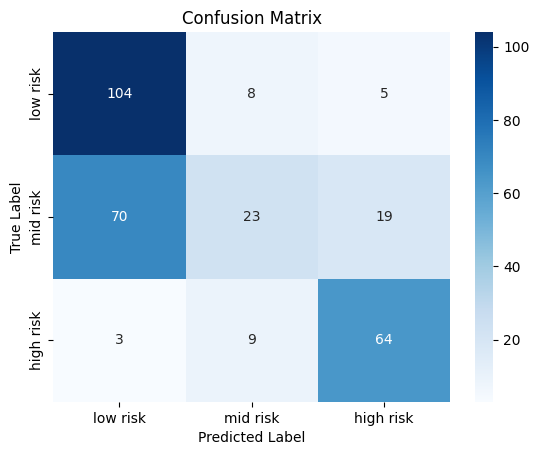

In [33]:
# Make some predictions with the model
y_pred = Model2.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = ['low risk', 'mid risk', 'high risk'], columns = ['low risk', 'mid risk', 'high risk'])

sns.heatmap(cm_df, annot = True, cmap = 'Blues', fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

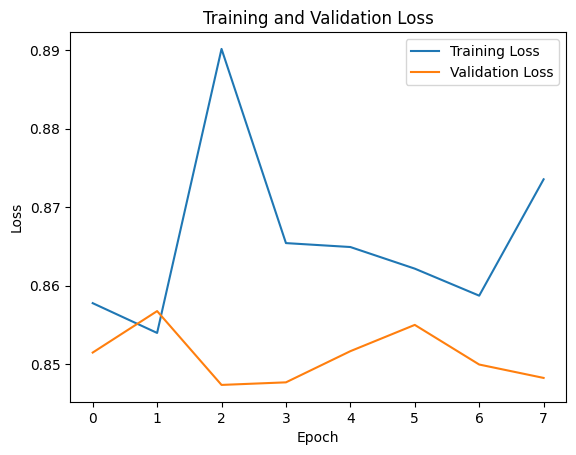

In [34]:
# plot the training and validation loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

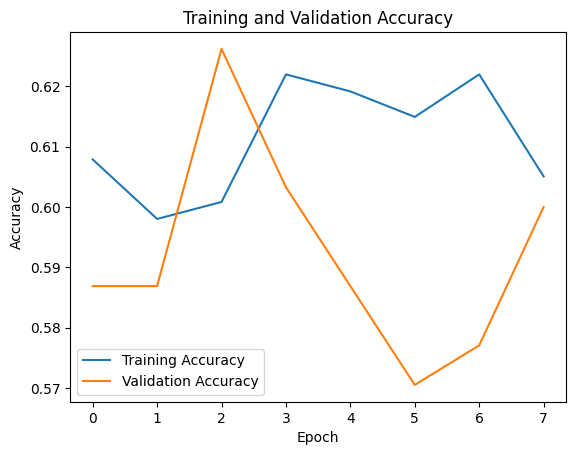

In [35]:
# plot the training and validation accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
# Save the model as Model2 in the Saved Models folder
pickle.dump(Model2, open('./Saved Models/mother_health_model2.pkl', 'wb'))

Looking at the data, its clear that the model is not performing well. So this forces us to look for a different skill and model to build and work with. 

# Using Decision Tree Classifier

Using the Decision Tree Classifier, we can try to improve the model.


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create the decision tree classifier
dtree = DecisionTreeClassifier(random_state=101)

# create the parameter grid
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# create the grid search object
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

# print the best score
print(grid_search.best_score_)

best_tree = grid_search.best_estimator_





{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8419638397762462


In [38]:


# evaluate the best model on the test set
test_accuracy = best_tree.score(X_test, y_test)
print('Test Accuracy: ', test_accuracy)



Test Accuracy:  0.8032786885245902


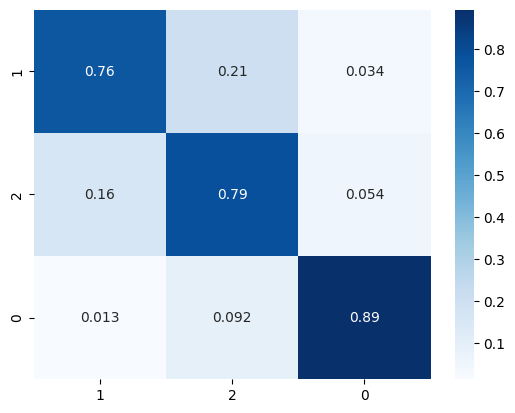

In [39]:


# visualize the confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

ypred = best_tree.predict(X_test)

labels = y_test.unique()

cm_tree = confusion_matrix(y_test, ypred, normalize='true')
plt.figure()
sns.heatmap(cm_tree, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.show()



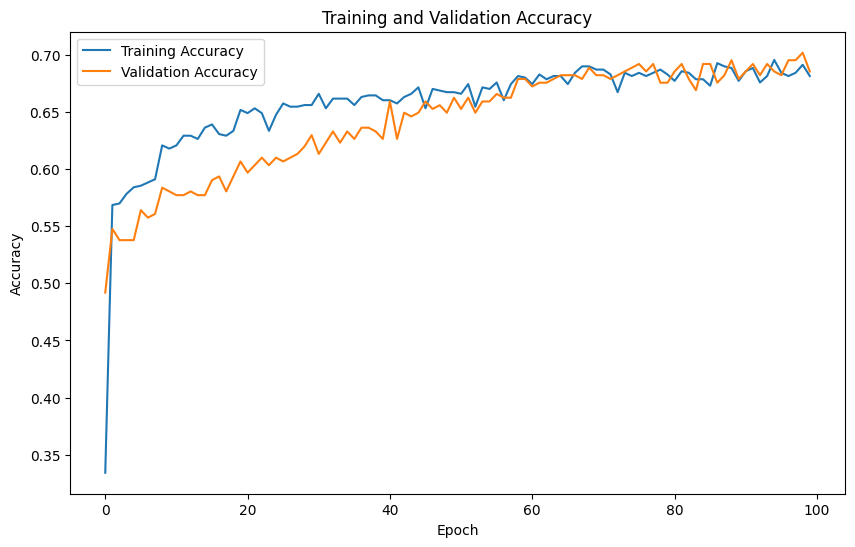

In [40]:
# plot the training and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

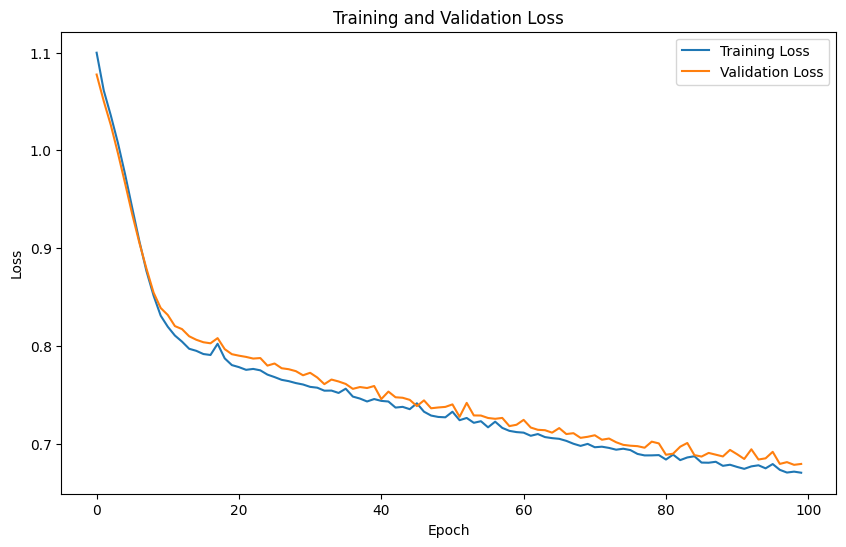

In [41]:
# plot the training and test loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Looking at both models, the Decision Tree Classifier is performing better than the Random Forest Classifier.In my case, I am using the Random Forest Classifier to build the model.



In [42]:

# Save the model as best_tree in the Saved Models folder
pickle.dump(best_tree, open('./Saved Models/mother_health_best_tree.pkl', 'wb'))



# CHoice of the best model

The best model to choose is the Decision Tree Classifier as it has the highest accuracy score of 0.80. The model was then saved and can be used to predict the risk level of a patient given the input data. 